In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [2]:
class Agent:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def move(self):
        dx, dy = np.random.choice([-1, 0, 1], size=2)
        self.x += dx
        self.y += dy

In [3]:
def simulate_random_walk(num_steps, lattice_size, file_prefix):
    agent = Agent(x=lattice_size//2, y=lattice_size//2)
    lattice = np.zeros((lattice_size, lattice_size))
    lattice[agent.x, agent.y] = 1
    images = []

    for i in range(num_steps):
        agent.move()
        if 0 <= agent.x < lattice_size and 0 <= agent.y < lattice_size:
            lattice[agent.x, agent.y] += 1

        fig, ax = plt.subplots()
        ax.imshow(lattice, cmap='hot')
        ax.axis('off')
        filename = f"{file_prefix}_{i:04d}.png"
        plt.savefig(filename, dpi=300)
        images.append(imageio.imread(filename))
        plt.close()

    imageio.mimsave(f"{file_prefix}.gif", images, fps=10)


In [6]:
simulate_random_walk(100, 100, "rm")

/var/folders/t3/86m1_zcd3tz_2_rp7vpph3g40000gn/T/ipykernel_4344/2203658656.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


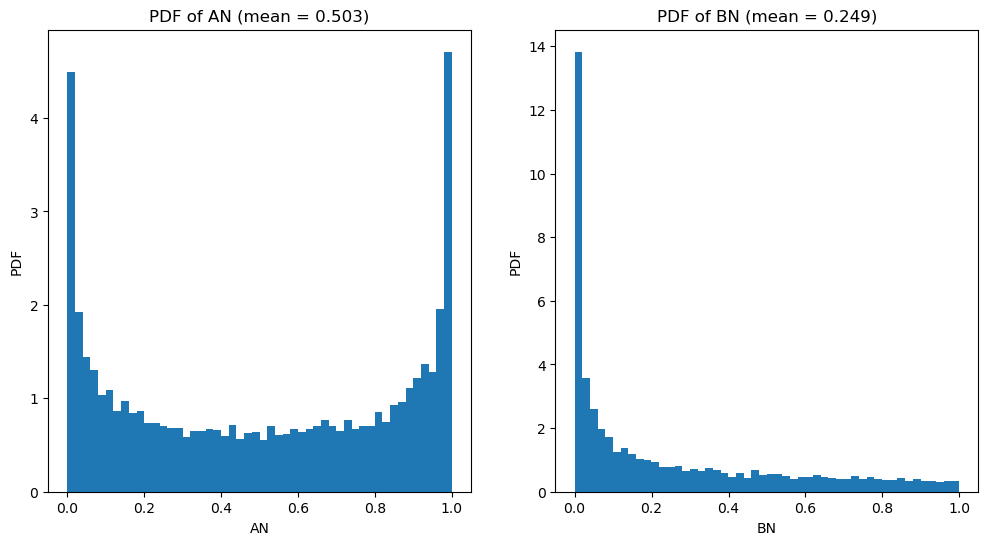

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_pearson_random_walk(num_walks, num_steps):
    AN_vals = []
    BN_vals = []
    for i in range(num_walks):
        x = 0
        y = 0
        AN_count = 0
        BN_count = 0
        for j in range(num_steps):
            angle = np.random.uniform(0, 2*np.pi)
            x += np.cos(angle)
            y += np.sin(angle)
            if x > 0:
                AN_count += 1
            if x > 0 and y > 0:
                BN_count += 1
        AN_vals.append(AN_count / num_steps)
        BN_vals.append(BN_count / num_steps)
    return AN_vals, BN_vals

num_walks = 10000
num_steps = 1000

AN_vals, BN_vals = simulate_pearson_random_walk(num_walks, num_steps)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(AN_vals, bins=50, density=True)
axs[0].set_xlabel('AN')
axs[0].set_ylabel('PDF')
axs[0].set_title(f'PDF of AN (mean = {np.mean(AN_vals):.3f})')
axs[1].hist(BN_vals, bins=50, density=True)
axs[1].set_xlabel('BN')
axs[1].set_ylabel('PDF')
axs[1].set_title(f'PDF of BN (mean = {np.mean(BN_vals):.3f})')
plt.show()


In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def random_walk_on_graph(G, origin_node, num_steps):
    current_node = origin_node
    node_visits = {node: 0 for node in G.nodes}
    node_visits[current_node] += 1
    for i in range(num_steps):
        next_node = np.random.choice(list(G.neighbors(current_node)))
        node_visits[next_node] += 1
        current_node = next_node
    return node_visits

def estimate_average_hitting_times(G, origin_node, num_simulations, num_steps):
    hitting_times = {node: 0 for node in G.nodes}
    for i in range(num_simulations):
        node_visits = random_walk_on_graph(G, origin_node, num_steps)
        for node in G.nodes:
            if node != origin_node:
                hitting_times[node] += node_visits[node]
    hitting_times = {node: hits/num_simulations for node, hits in hitting_times.items()}
    return hitting_times

def animate_random_walk_on_graph(G, origin_node, num_steps):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title('Random Walk on Graph Animation')
    pos = nx.spring_layout(G, seed=1)
    nodes = nx.draw_networkx_nodes(G, pos, node_size=200, node_color='lightblue')
    edges = nx.draw_networkx_edges(G, pos, alpha=0.5)
    labels = {node: node if node == origin_node else '' for node in G.nodes}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=16)
    current_node = origin_node
    node_colors = ['lightblue' for _ in range(len(G.nodes))]
    node_colors[current_node] = 'red'
    nodes.set_color(node_colors)
    def animate(i):
        nonlocal current_node
        next_node = np.random.choice(list(G.neighbors(current_node)))
        node_colors = ['lightblue' for _ in range(len(G.nodes))]
        node_colors[current_node] = 'blue'
        node_colors[next_node] = 'red'
        nodes.set_color(node_colors)
        current_node = next_node
        return nodes, edges
    ani = animation.FuncAnimation(fig, animate, frames=num_steps, repeat=False)
    plt.show()

In [12]:
# Generate a random graph with 20 nodes
G = nx.erdos_renyi_graph(20, 0.2)

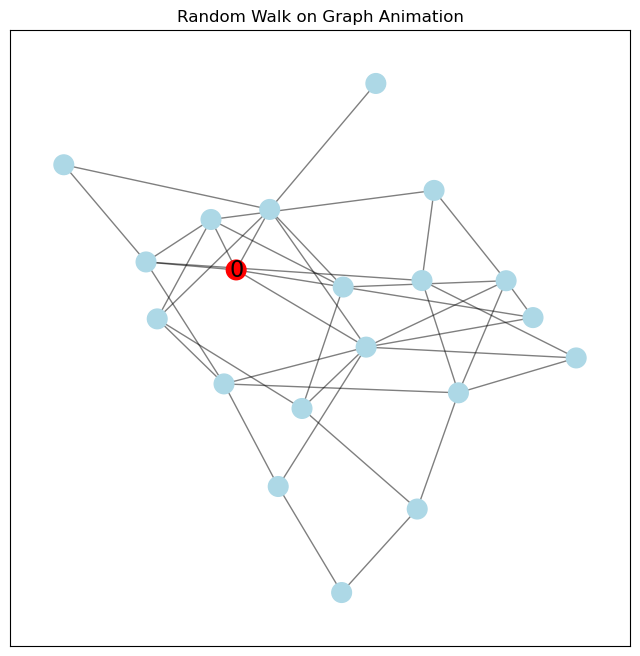

In [13]:
# Visualize a random walk starting from node 0
animate_random_walk_on_graph(G, 0, 100)

In [14]:
# Estimate average hitting times starting from node 0 for all other nodes
hitting_times = estimate_average_hitting_times(G, 0, 1000, 1000)
print(hitting_times)



{0: 0.0, 1: 60.807, 2: 48.929, 3: 36.556, 4: 73.354, 5: 36.558, 6: 36.396, 7: 97.202, 8: 12.21, 9: 24.46, 10: 60.891, 11: 36.675, 12: 73.073, 13: 60.946, 14: 49.273, 15: 48.806, 16: 61.086, 17: 24.466, 18: 36.432, 19: 61.215}
